## Figure 4: compute datasets

In [1]:
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from statannotations.Annotator import Annotator

from hypergraph_reducibility import find_charact_tau, optimization

sb.set_theme(style="ticks", context="paper")

In [2]:
results_dir = "../results/"
out_dir = f"{results_dir}datasets/"

## try dataset

In [4]:
xgi.load_xgi_data()

Available datasets are the following:
coauth-dblp
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
dawn
diseasome
disgenenet
email-enron
email-eu
hospital-lyon
hypertext-conference
invs13
invs15
kaggle-whats-cooking
malawi-village
ndc-classes
ndc-substances
science-gallery
sfhh-conference
tags-ask-ubuntu
tags-math-sx
tags-stack-overflow
threads-ask-ubuntu
threads-math-sx
threads-stack-overflow


In [19]:
data_names = [
    # "email-enron",
    # "email-eu",
    # "kaggle-whats-cooking",
    # "hospital-lyon",
    # "contact-high-school",
    # "contact-primary-school",
    # "sfhh-conference",
    # "hypertext-conference",
    # "science-gallery",
    # "invs13",
    # "invs15",
    "tags-ask-ubuntu",
    # "tags-math-sx",
    # "tags-stack-overflow",
    # "congress-bills",
    # "disgenenet",
    # "diseasome",
    # "malawi-village",
    # "ndc-classes",
    # "ndc-substances",
    # "coauth-mag-geology",
    # "coauth-mag-history",
    # "coauth-dblp",
    # "dawn"
]

HGs = {}
for name in tqdm(data_names):
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)

100%|█████████████████████████████████████████████| 1/1 [00:08<00:00,  8.69s/it]


In [20]:
i = 0  # choose dataset here
name = data_names[i]
print(name)
H0 = HGs[name]
print(H0)
print("max order:", xgi.max_edge_order(H0))
H0.cleanup(isolates=True)
print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))
N = H0.num_nodes

rescale = True

H = H0.copy()

tags-ask-ubuntu
Hypergraph named tags-ask-ubuntu with 3029 nodes and 271233 hyperedges
max order: 4
Hypergraph named tags-ask-ubuntu with 3021 nodes and 145053 hyperedges


In [21]:
# slice by years for coauthorship

# years = [H.edges[i]["timestamp"] for i in H.edges]
# year = 1983
# name = data_names[i]
# name += f"_{year}"
# idx_keep = np.where(np.array(years)==year)[0]

# H0 = xgi.subhypergraph(H, edges=idx_keep).copy()

# print(H0)
# H0.cleanup(isolates=False, singletons=True, connected=True)
# print(H0)

# orders = np.array(xgi.unique_edge_sizes(H0)) - 1
# weights = np.ones(len(orders))
# N = H0.num_nodes

In [22]:
name

'tags-ask-ubuntu'

In [23]:
sparse = False

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

    tau_c = find_charact_tau(
        H0, orders, weights, rescale_per_node=rescale, sparse_Lap=True, idx=-1
    )
tau_c

0.0033688303050038735

In [26]:
# inverse_rescaling_factors = [max(orders) / d for d in orders]

inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders) + 1)]
suffix = "rescaling_present_orders"

# inverse_rescaling_factors = list(range(1, len(orders)+1))[::-1]

# inverse_rescaling_factors = [1 for d in orders]
# suffix = "no_rescaling"

tau_per_order = False

# tau_c = 1
# suffix = "tau_per_order"

if tau_per_order and suffix != "tau_per_order":
    raise ValueError("check input params")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

    Ds_H, lZs_H = optimization(
        H0,
        tau_c,
        rescaling_factors=inverse_rescaling_factors,
        tau_per_order=tau_per_order,
        rescale_per_node=rescale,
        sparse=sparse,
        sparse_Lap=True,
    )

100%|█████████████████████████████████████████████| 4/4 [01:21<00:00, 20.34s/it]


In [27]:
# xgi.load_xgi_data()

In [28]:
# name = "hypertext-conference"
# data = np.load(f"{out_dir}/message_length_{name}.npz")

# message_length = data["message_length"]
# Ds_H = data["KL"]
# lZs_H = data["complexity"]
# orders = data["orders"]
# N = int(data["N"])

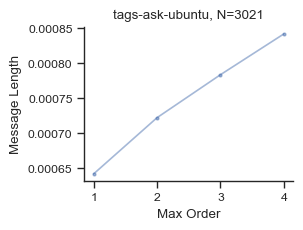

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-", ms=2, alpha=0.5)


ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

# ax.set_title(f"{name} {year}, N={N}")
ax.set_title(f"{name}, N={N}")

sb.despine()

# fig_name = f"message_length_{name}_{year}_rescaled_tauc"
# fig_name = f"message_length_{name}_rescaled_tauc"
fig_name = f"message_length_{name}_{suffix}_tauc"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

1


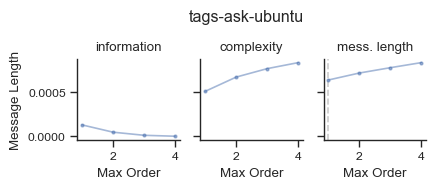

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(4.5, 1.5), sharey=True)

message_length = Ds_H + lZs_H
# message_length2 = Ds_H2 + lZs_H2


axs[0].plot(orders, Ds_H, "o-", ms=2, alpha=0.5, label="no rescaling")
# axs[0].plot(orders, Ds_H2, "o-", ms=2, alpha=0.5, label="rescaling")
axs[0].set_title("information")

axs[1].plot(orders, lZs_H, "o-", ms=2, alpha=0.5)
# axs[1].plot(orders, lZs_H2, "o-", ms=2, alpha=0.5)
axs[1].set_title("complexity")

axs[2].plot(orders, message_length, "o-", ms=2, alpha=0.5)
# axs[2].plot(orders, message_length2, "o-", ms=2, alpha=0.5)
axs[2].set_title("mess. length")


axs[0].set_ylabel("Message Length")
axs[0].set_xlabel("Max Order")
axs[1].set_xlabel("Max Order")
axs[2].set_xlabel("Max Order")

order_argmin = np.argmin(message_length)
order_min = orders[order_argmin]
print(order_min)

axs[2].axvline(order_min, ls="--", c="grey", zorder=-2, alpha=0.4)


# ax.set_title("functional complex.")

# ax.set_title(f"{name} {year}, N={N}")
# fig.suptitle(f"{name}_{year}")
fig.suptitle(f"{name}")

sb.despine()
plt.subplots_adjust(top=0.65)

# fig_name = f"message_length_{name}_{year}_rescaled_tauc_full"
# fig_name = f"message_length_{name}_rescaled_tauc_full"
fig_name = f"message_length_{name}_{suffix}_tauc_full"

# axs[0].set_ylim(-0.0002, 0.015)
# axs[0].legend(frameon=False, fontsize="x-small")

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [31]:
np.savez(
    f"{out_dir}/message_length_{name}_{suffix}.npz",
    # f"{out_dir}/message_length_{name}_{year}.npz",
    message_length=Ds_H + lZs_H,
    KL=Ds_H,
    complexity=lZs_H,
    orders=orders,
    dataset=name,
    # year=year,
    N=N,
    num_edges=H0.num_edges,
    tau_c=tau_c,
    order_min=order_min,
)

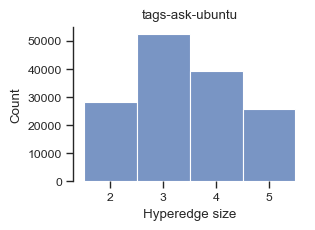

In [32]:
bins = np.arange(1.5, max(orders) + 1 + 1.5, 1)

fig, ax = plt.subplots(figsize=(3, 2))

sb.histplot(H0.edges.size.asnumpy(), bins=bins)

ax.set_xlabel("Hyperedge size")
ax.set_title(name)

sb.despine(bottom=True)

fig_name = f"dataset_{name}_edge_size_hist"

# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [34]:
name

'kaggle-whats-cooking'